# Conditional GAN으로 생성 컨트롤하기

In [ ]:
import os
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torchvision.utils import save_image
import matplotlib.pyplot as plt

In [40]:
torch.manual_seed(1)    # reproducible

In [56]:
# Hyper Parameters
EPOCHS = 100
BATCH_SIZE = 100
USE_CDA = torch.cuda.is_available()
DEVICE = -1#torch.device("cuda" if USE_CUDA else "cpu")
print("Using Device:", DEVICE)

Using Device: -1


In [57]:
# Fashion MNIST digits dataset
trainset = datasets.FashionMNIST('./.data',
    train=True,
    download=True,
    transform=transforms.Compose([
       transforms.ToTensor(),
       transforms.Normalize((0.5,), (0.5,))
    ]))
train_loader = torch.utils.data.DataLoader(
    dataset     = trainset,
    batch_size  = BATCH_SIZE,
    shuffle     = True)

In [60]:
def one_hot_embedding(labels, num_classes):
    y = torch.eye(num_classes) 
    return y[labels]

In [61]:
# Discriminator
D = nn.Sequential(
        nn.Linear(784, 256),
        nn.LeakyReLU(0.2),
        nn.Linear(256, 256),
        nn.LeakyReLU(0.2),
        nn.Linear(256, 1),
        nn.Sigmoid())

In [62]:
# Generator 
G = nn.Sequential(
        nn.Linear(64 + 10, 256),
        nn.ReLU(),
        nn.Linear(256, 256),
        nn.ReLU(),
        nn.Linear(256, 784),
        nn.Tanh())

In [63]:

# Device setting
# D = D.to(DEVICE)
# G = G.to(DEVICE)

# Binary cross entropy loss and optimizer
criterion = nn.BCELoss()
d_optimizer = optim.Adam(D.parameters(), lr=0.0002)
g_optimizer = optim.Adam(G.parameters(), lr=0.0002)

Epoch [0/100], Step [200/600], d_loss: 0.2035, g_loss: 3.9137, D(x): 0.96, D(G(z)): 0.14
Epoch [0/100], Step [400/600], d_loss: 0.0542, g_loss: 4.0524, D(x): 0.99, D(G(z)): 0.04
Epoch [0/100], Step [600/600], d_loss: 0.0192, g_loss: 5.1181, D(x): 0.99, D(G(z)): 0.01
Epoch [1/100], Step [200/600], d_loss: 0.0808, g_loss: 5.1402, D(x): 0.96, D(G(z)): 0.01
Epoch [1/100], Step [400/600], d_loss: 0.0702, g_loss: 4.7745, D(x): 0.97, D(G(z)): 0.02
Epoch [1/100], Step [600/600], d_loss: 0.0312, g_loss: 6.6559, D(x): 0.98, D(G(z)): 0.00
Epoch [2/100], Step [200/600], d_loss: 0.0587, g_loss: 5.9569, D(x): 0.98, D(G(z)): 0.01
Epoch [2/100], Step [400/600], d_loss: 0.0221, g_loss: 7.4173, D(x): 0.99, D(G(z)): 0.00
Epoch [2/100], Step [600/600], d_loss: 0.0687, g_loss: 5.2643, D(x): 0.98, D(G(z)): 0.04
Epoch [3/100], Step [200/600], d_loss: 0.0520, g_loss: 8.1650, D(x): 0.99, D(G(z)): 0.03
Epoch [3/100], Step [400/600], d_loss: 0.0428, g_loss: 4.2432, D(x): 1.00, D(G(z)): 0.04
Epoch [3/100], Step [

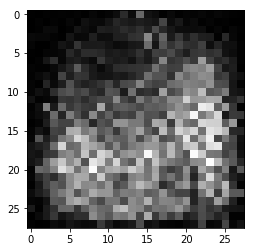

Epoch [9/100], Step [200/600], d_loss: 0.1385, g_loss: 6.0198, D(x): 0.95, D(G(z)): 0.01


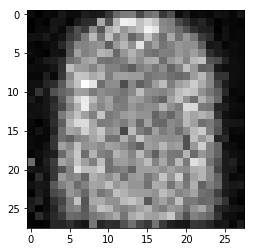

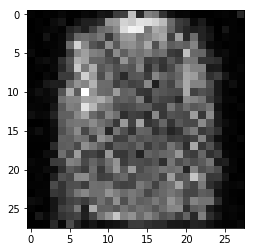

Epoch [9/100], Step [400/600], d_loss: 0.3028, g_loss: 3.1371, D(x): 0.91, D(G(z)): 0.06


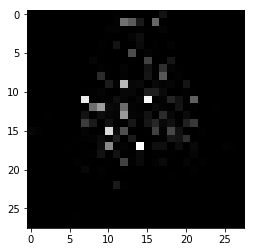

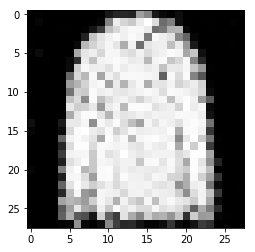

Epoch [9/100], Step [600/600], d_loss: 0.2114, g_loss: 4.0104, D(x): 0.92, D(G(z)): 0.04


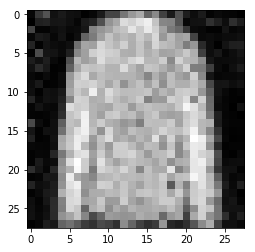

Epoch [10/100], Step [200/600], d_loss: 0.1456, g_loss: 5.0011, D(x): 0.96, D(G(z)): 0.07
Epoch [10/100], Step [400/600], d_loss: 0.1838, g_loss: 4.4171, D(x): 0.94, D(G(z)): 0.08
Epoch [10/100], Step [600/600], d_loss: 0.3961, g_loss: 3.3184, D(x): 0.86, D(G(z)): 0.07
Epoch [11/100], Step [200/600], d_loss: 0.3092, g_loss: 3.9105, D(x): 0.90, D(G(z)): 0.09
Epoch [11/100], Step [400/600], d_loss: 0.4723, g_loss: 3.8885, D(x): 0.84, D(G(z)): 0.09
Epoch [11/100], Step [600/600], d_loss: 0.3135, g_loss: 3.1948, D(x): 0.93, D(G(z)): 0.12
Epoch [12/100], Step [200/600], d_loss: 0.3178, g_loss: 4.5334, D(x): 0.90, D(G(z)): 0.08
Epoch [12/100], Step [400/600], d_loss: 0.5013, g_loss: 3.7907, D(x): 0.83, D(G(z)): 0.08
Epoch [12/100], Step [600/600], d_loss: 0.3071, g_loss: 3.5431, D(x): 0.94, D(G(z)): 0.16
Epoch [13/100], Step [200/600], d_loss: 0.4607, g_loss: 3.3709, D(x): 0.85, D(G(z)): 0.11
Epoch [13/100], Step [400/600], d_loss: 0.7608, g_loss: 3.8773, D(x): 0.79, D(G(z)): 0.08
Epoch [13/

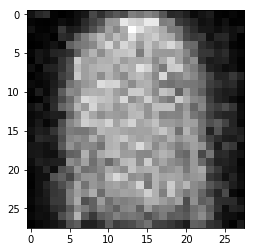

Epoch [19/100], Step [200/600], d_loss: 0.3952, g_loss: 4.1515, D(x): 0.86, D(G(z)): 0.08


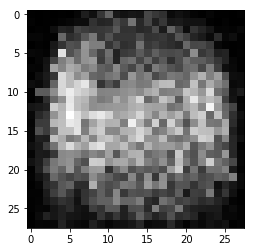

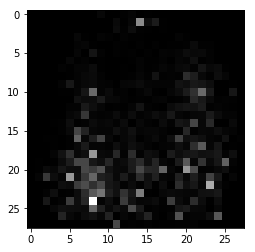

Epoch [19/100], Step [400/600], d_loss: 0.4642, g_loss: 2.5844, D(x): 0.87, D(G(z)): 0.18


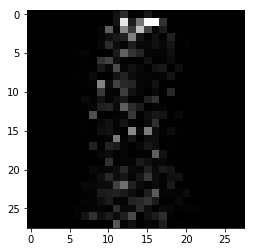

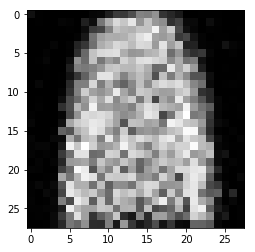

Epoch [19/100], Step [600/600], d_loss: 0.6806, g_loss: 2.8578, D(x): 0.90, D(G(z)): 0.32


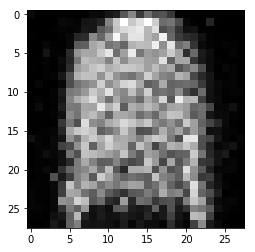

Epoch [20/100], Step [200/600], d_loss: 0.3973, g_loss: 2.5558, D(x): 0.91, D(G(z)): 0.17
Epoch [20/100], Step [400/600], d_loss: 0.6671, g_loss: 2.9228, D(x): 0.82, D(G(z)): 0.15
Epoch [20/100], Step [600/600], d_loss: 0.3758, g_loss: 2.5956, D(x): 0.91, D(G(z)): 0.18
Epoch [21/100], Step [200/600], d_loss: 0.3417, g_loss: 3.5634, D(x): 0.86, D(G(z)): 0.10
Epoch [21/100], Step [400/600], d_loss: 0.4332, g_loss: 2.9738, D(x): 0.87, D(G(z)): 0.15
Epoch [21/100], Step [600/600], d_loss: 0.4375, g_loss: 2.7782, D(x): 0.84, D(G(z)): 0.07
Epoch [22/100], Step [200/600], d_loss: 0.4174, g_loss: 3.9002, D(x): 0.82, D(G(z)): 0.05
Epoch [22/100], Step [400/600], d_loss: 0.5181, g_loss: 3.5011, D(x): 0.82, D(G(z)): 0.09
Epoch [22/100], Step [600/600], d_loss: 0.3887, g_loss: 2.8743, D(x): 0.90, D(G(z)): 0.16
Epoch [23/100], Step [200/600], d_loss: 0.4331, g_loss: 2.6976, D(x): 0.88, D(G(z)): 0.13
Epoch [23/100], Step [400/600], d_loss: 0.5086, g_loss: 3.3666, D(x): 0.88, D(G(z)): 0.17
Epoch [23/

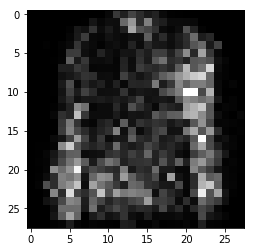

Epoch [29/100], Step [200/600], d_loss: 0.6001, g_loss: 2.9246, D(x): 0.84, D(G(z)): 0.13


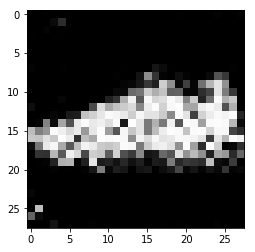

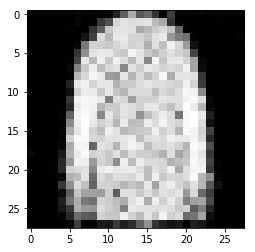

Epoch [29/100], Step [400/600], d_loss: 0.5485, g_loss: 3.6260, D(x): 0.82, D(G(z)): 0.11


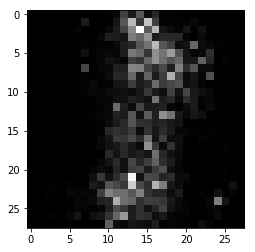

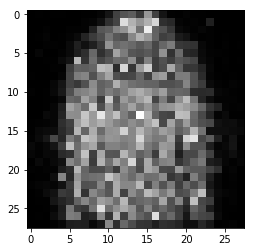

Epoch [29/100], Step [600/600], d_loss: 0.4671, g_loss: 3.2315, D(x): 0.85, D(G(z)): 0.14


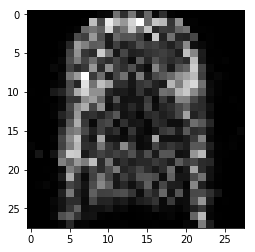

Epoch [30/100], Step [200/600], d_loss: 0.4772, g_loss: 3.1470, D(x): 0.84, D(G(z)): 0.16
Epoch [30/100], Step [400/600], d_loss: 0.3764, g_loss: 3.6928, D(x): 0.88, D(G(z)): 0.14
Epoch [30/100], Step [600/600], d_loss: 0.5545, g_loss: 3.0743, D(x): 0.86, D(G(z)): 0.17
Epoch [31/100], Step [200/600], d_loss: 0.6481, g_loss: 2.3916, D(x): 0.78, D(G(z)): 0.11
Epoch [31/100], Step [400/600], d_loss: 0.5947, g_loss: 3.2357, D(x): 0.80, D(G(z)): 0.11
Epoch [31/100], Step [600/600], d_loss: 0.5403, g_loss: 2.5951, D(x): 0.80, D(G(z)): 0.14
Epoch [32/100], Step [200/600], d_loss: 0.5204, g_loss: 3.1277, D(x): 0.81, D(G(z)): 0.13
Epoch [32/100], Step [400/600], d_loss: 0.5142, g_loss: 2.5735, D(x): 0.87, D(G(z)): 0.21
Epoch [32/100], Step [600/600], d_loss: 0.4991, g_loss: 2.8324, D(x): 0.88, D(G(z)): 0.22
Epoch [33/100], Step [200/600], d_loss: 0.3101, g_loss: 3.0996, D(x): 0.87, D(G(z)): 0.10
Epoch [33/100], Step [400/600], d_loss: 0.4332, g_loss: 3.0330, D(x): 0.90, D(G(z)): 0.22
Epoch [33/

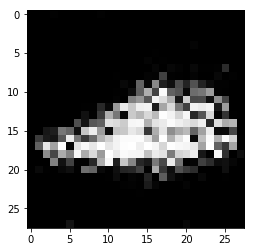

Epoch [39/100], Step [200/600], d_loss: 0.5542, g_loss: 2.7719, D(x): 0.85, D(G(z)): 0.17


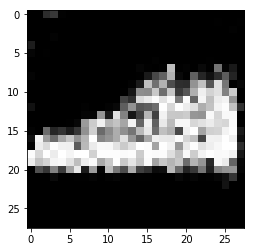

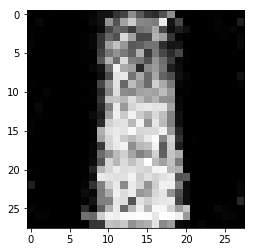

Epoch [39/100], Step [400/600], d_loss: 0.5063, g_loss: 2.7338, D(x): 0.89, D(G(z)): 0.18


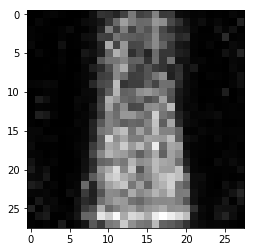

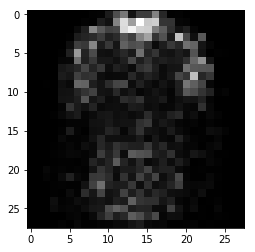

Epoch [39/100], Step [600/600], d_loss: 0.6252, g_loss: 2.8259, D(x): 0.77, D(G(z)): 0.12


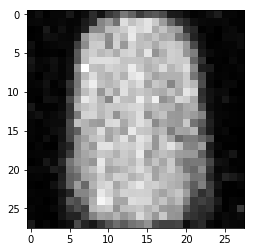

Epoch [40/100], Step [200/600], d_loss: 0.7085, g_loss: 3.4095, D(x): 0.73, D(G(z)): 0.09
Epoch [40/100], Step [400/600], d_loss: 0.6398, g_loss: 2.3409, D(x): 0.77, D(G(z)): 0.15
Epoch [40/100], Step [600/600], d_loss: 0.9065, g_loss: 2.2767, D(x): 0.74, D(G(z)): 0.17
Epoch [41/100], Step [200/600], d_loss: 0.5057, g_loss: 2.6391, D(x): 0.81, D(G(z)): 0.16
Epoch [41/100], Step [400/600], d_loss: 0.4491, g_loss: 2.6453, D(x): 0.91, D(G(z)): 0.25
Epoch [41/100], Step [600/600], d_loss: 0.5700, g_loss: 3.8240, D(x): 0.77, D(G(z)): 0.07
Epoch [42/100], Step [200/600], d_loss: 0.5080, g_loss: 2.4408, D(x): 0.83, D(G(z)): 0.17
Epoch [42/100], Step [400/600], d_loss: 0.4391, g_loss: 3.3419, D(x): 0.89, D(G(z)): 0.17
Epoch [42/100], Step [600/600], d_loss: 0.7391, g_loss: 2.7630, D(x): 0.82, D(G(z)): 0.26
Epoch [43/100], Step [200/600], d_loss: 0.5475, g_loss: 2.6050, D(x): 0.84, D(G(z)): 0.17
Epoch [43/100], Step [400/600], d_loss: 0.5055, g_loss: 3.6377, D(x): 0.83, D(G(z)): 0.12
Epoch [43/

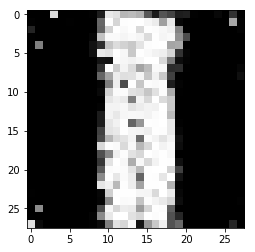

Epoch [49/100], Step [200/600], d_loss: 0.5482, g_loss: 2.3738, D(x): 0.81, D(G(z)): 0.16


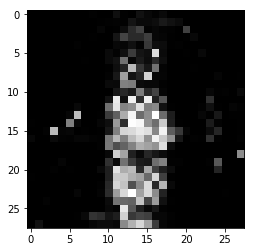

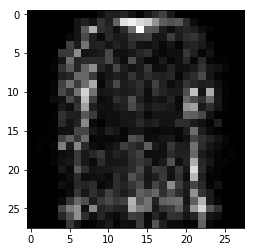

Epoch [49/100], Step [400/600], d_loss: 0.7994, g_loss: 2.7710, D(x): 0.76, D(G(z)): 0.18


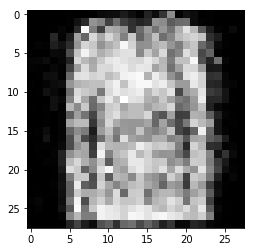

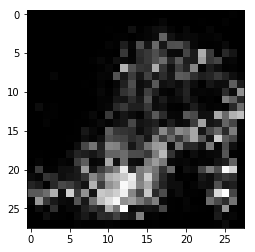

Epoch [49/100], Step [600/600], d_loss: 0.8800, g_loss: 2.4871, D(x): 0.73, D(G(z)): 0.20


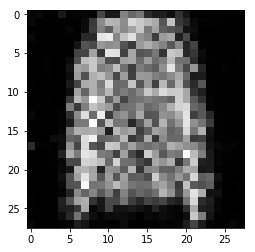

Epoch [50/100], Step [200/600], d_loss: 0.6667, g_loss: 2.0665, D(x): 0.86, D(G(z)): 0.29
Epoch [50/100], Step [400/600], d_loss: 0.7400, g_loss: 1.8717, D(x): 0.80, D(G(z)): 0.27
Epoch [50/100], Step [600/600], d_loss: 0.5440, g_loss: 2.7282, D(x): 0.80, D(G(z)): 0.14
Epoch [51/100], Step [200/600], d_loss: 0.7447, g_loss: 3.0575, D(x): 0.70, D(G(z)): 0.14
Epoch [51/100], Step [400/600], d_loss: 0.6675, g_loss: 2.7761, D(x): 0.77, D(G(z)): 0.17
Epoch [51/100], Step [600/600], d_loss: 0.7026, g_loss: 2.8709, D(x): 0.76, D(G(z)): 0.17
Epoch [52/100], Step [200/600], d_loss: 0.8622, g_loss: 2.0638, D(x): 0.80, D(G(z)): 0.32
Epoch [52/100], Step [400/600], d_loss: 0.6923, g_loss: 2.5754, D(x): 0.76, D(G(z)): 0.18
Epoch [52/100], Step [600/600], d_loss: 0.6795, g_loss: 2.2738, D(x): 0.79, D(G(z)): 0.22
Epoch [53/100], Step [200/600], d_loss: 0.8024, g_loss: 2.5156, D(x): 0.76, D(G(z)): 0.21
Epoch [53/100], Step [400/600], d_loss: 0.7401, g_loss: 2.3302, D(x): 0.75, D(G(z)): 0.22
Epoch [53/

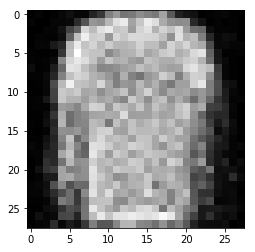

Epoch [59/100], Step [200/600], d_loss: 0.6552, g_loss: 1.7482, D(x): 0.77, D(G(z)): 0.21


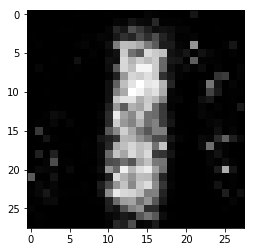

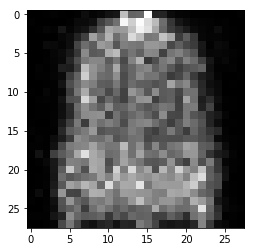

Epoch [59/100], Step [400/600], d_loss: 0.6363, g_loss: 2.5490, D(x): 0.76, D(G(z)): 0.13


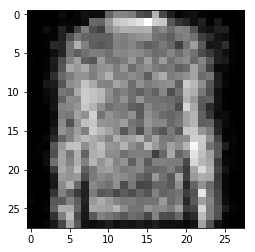

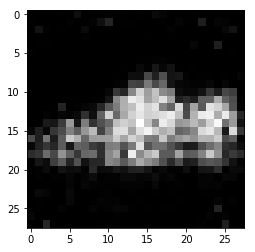

Epoch [59/100], Step [600/600], d_loss: 0.8082, g_loss: 1.9799, D(x): 0.79, D(G(z)): 0.27


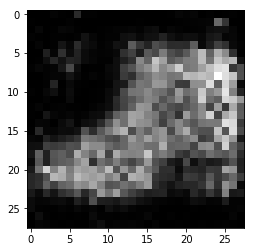

Epoch [60/100], Step [200/600], d_loss: 0.8422, g_loss: 2.2487, D(x): 0.82, D(G(z)): 0.31
Epoch [60/100], Step [400/600], d_loss: 0.8423, g_loss: 2.0256, D(x): 0.75, D(G(z)): 0.26
Epoch [60/100], Step [600/600], d_loss: 0.8343, g_loss: 1.7592, D(x): 0.79, D(G(z)): 0.32
Epoch [61/100], Step [200/600], d_loss: 0.7024, g_loss: 1.9968, D(x): 0.75, D(G(z)): 0.22
Epoch [61/100], Step [400/600], d_loss: 1.0943, g_loss: 2.0380, D(x): 0.82, D(G(z)): 0.40
Epoch [61/100], Step [600/600], d_loss: 0.6003, g_loss: 2.2911, D(x): 0.80, D(G(z)): 0.17
Epoch [62/100], Step [200/600], d_loss: 0.8801, g_loss: 2.2538, D(x): 0.67, D(G(z)): 0.21
Epoch [62/100], Step [400/600], d_loss: 0.6971, g_loss: 2.5297, D(x): 0.75, D(G(z)): 0.17
Epoch [62/100], Step [600/600], d_loss: 0.5634, g_loss: 2.1000, D(x): 0.84, D(G(z)): 0.22
Epoch [63/100], Step [200/600], d_loss: 0.8558, g_loss: 2.3628, D(x): 0.73, D(G(z)): 0.21
Epoch [63/100], Step [400/600], d_loss: 0.7902, g_loss: 2.8243, D(x): 0.75, D(G(z)): 0.19
Epoch [63/

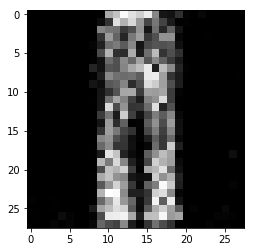

Epoch [69/100], Step [200/600], d_loss: 0.6150, g_loss: 1.8605, D(x): 0.85, D(G(z)): 0.28


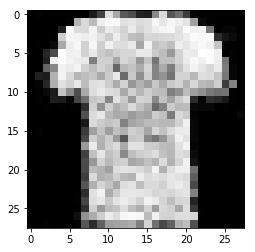

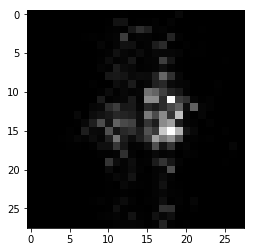

Epoch [69/100], Step [400/600], d_loss: 0.6684, g_loss: 1.9877, D(x): 0.81, D(G(z)): 0.23


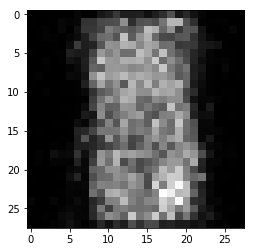

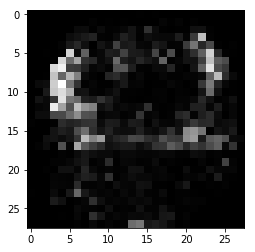

Epoch [69/100], Step [600/600], d_loss: 0.6155, g_loss: 2.3458, D(x): 0.80, D(G(z)): 0.23


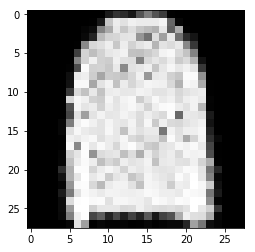

Epoch [70/100], Step [200/600], d_loss: 0.7979, g_loss: 2.5440, D(x): 0.74, D(G(z)): 0.21
Epoch [70/100], Step [400/600], d_loss: 0.6953, g_loss: 2.5984, D(x): 0.75, D(G(z)): 0.21
Epoch [70/100], Step [600/600], d_loss: 0.7429, g_loss: 2.3535, D(x): 0.80, D(G(z)): 0.26
Epoch [71/100], Step [200/600], d_loss: 0.6043, g_loss: 2.2572, D(x): 0.79, D(G(z)): 0.22
Epoch [71/100], Step [400/600], d_loss: 0.8873, g_loss: 2.3978, D(x): 0.65, D(G(z)): 0.19
Epoch [71/100], Step [600/600], d_loss: 0.7389, g_loss: 2.2759, D(x): 0.82, D(G(z)): 0.30
Epoch [72/100], Step [200/600], d_loss: 0.6736, g_loss: 1.9503, D(x): 0.80, D(G(z)): 0.26
Epoch [72/100], Step [400/600], d_loss: 0.7861, g_loss: 2.2692, D(x): 0.73, D(G(z)): 0.24
Epoch [72/100], Step [600/600], d_loss: 0.8364, g_loss: 2.0216, D(x): 0.77, D(G(z)): 0.29
Epoch [73/100], Step [200/600], d_loss: 0.6532, g_loss: 2.3652, D(x): 0.78, D(G(z)): 0.21
Epoch [73/100], Step [400/600], d_loss: 0.8202, g_loss: 1.8233, D(x): 0.75, D(G(z)): 0.26
Epoch [73/

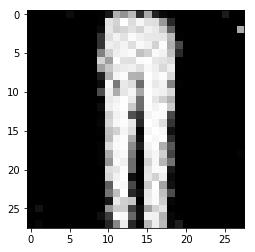

Epoch [79/100], Step [200/600], d_loss: 0.8482, g_loss: 1.7865, D(x): 0.74, D(G(z)): 0.29


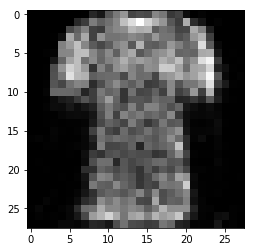

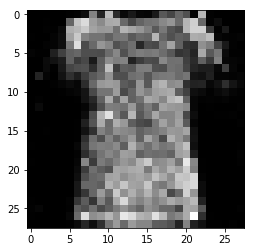

Epoch [79/100], Step [400/600], d_loss: 0.8663, g_loss: 2.0808, D(x): 0.67, D(G(z)): 0.19


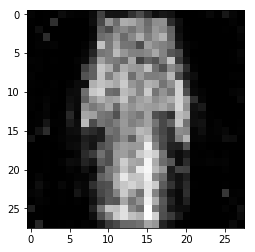

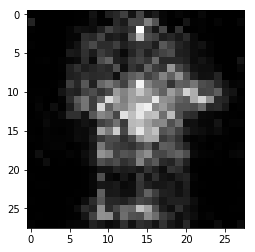

Epoch [79/100], Step [600/600], d_loss: 0.7074, g_loss: 1.9598, D(x): 0.77, D(G(z)): 0.24


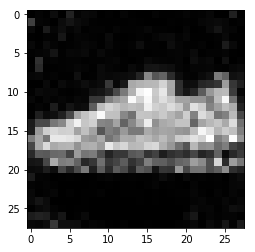

Epoch [80/100], Step [200/600], d_loss: 0.8240, g_loss: 1.8282, D(x): 0.69, D(G(z)): 0.20
Epoch [80/100], Step [400/600], d_loss: 0.6550, g_loss: 2.1664, D(x): 0.76, D(G(z)): 0.22
Epoch [80/100], Step [600/600], d_loss: 1.1597, g_loss: 1.7326, D(x): 0.69, D(G(z)): 0.32
Epoch [81/100], Step [200/600], d_loss: 0.7913, g_loss: 2.1007, D(x): 0.73, D(G(z)): 0.24
Epoch [81/100], Step [400/600], d_loss: 0.7218, g_loss: 1.9763, D(x): 0.76, D(G(z)): 0.21
Epoch [81/100], Step [600/600], d_loss: 0.9085, g_loss: 1.6962, D(x): 0.72, D(G(z)): 0.27
Epoch [82/100], Step [200/600], d_loss: 0.9136, g_loss: 1.9682, D(x): 0.68, D(G(z)): 0.23
Epoch [82/100], Step [400/600], d_loss: 0.8184, g_loss: 1.8102, D(x): 0.75, D(G(z)): 0.29
Epoch [82/100], Step [600/600], d_loss: 0.5965, g_loss: 2.7580, D(x): 0.82, D(G(z)): 0.20
Epoch [83/100], Step [200/600], d_loss: 0.8524, g_loss: 2.1884, D(x): 0.70, D(G(z)): 0.20
Epoch [83/100], Step [400/600], d_loss: 0.9646, g_loss: 2.0833, D(x): 0.71, D(G(z)): 0.31
Epoch [83/

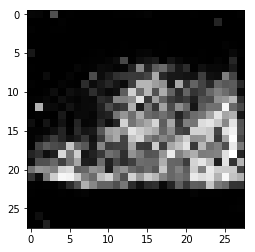

Epoch [89/100], Step [200/600], d_loss: 0.8251, g_loss: 1.5866, D(x): 0.80, D(G(z)): 0.35


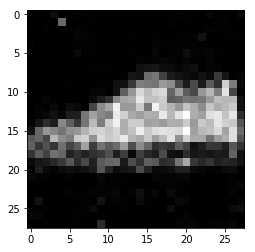

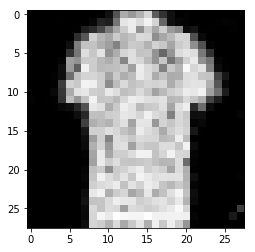

Epoch [89/100], Step [400/600], d_loss: 1.1279, g_loss: 1.7734, D(x): 0.62, D(G(z)): 0.29


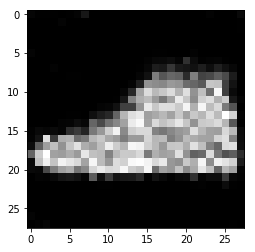

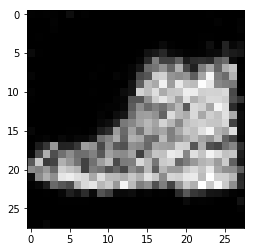

Epoch [89/100], Step [600/600], d_loss: 0.8536, g_loss: 1.7385, D(x): 0.75, D(G(z)): 0.29


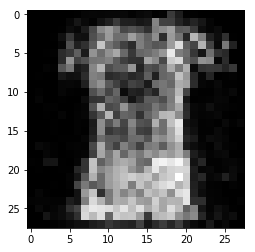

Epoch [90/100], Step [200/600], d_loss: 0.8738, g_loss: 1.5906, D(x): 0.74, D(G(z)): 0.29
Epoch [90/100], Step [400/600], d_loss: 1.2278, g_loss: 1.3936, D(x): 0.75, D(G(z)): 0.43
Epoch [90/100], Step [600/600], d_loss: 0.6898, g_loss: 2.0376, D(x): 0.72, D(G(z)): 0.20
Epoch [91/100], Step [200/600], d_loss: 0.8308, g_loss: 2.1050, D(x): 0.70, D(G(z)): 0.21
Epoch [91/100], Step [400/600], d_loss: 0.7323, g_loss: 2.1244, D(x): 0.78, D(G(z)): 0.25
Epoch [91/100], Step [600/600], d_loss: 0.9262, g_loss: 2.0154, D(x): 0.68, D(G(z)): 0.23
Epoch [92/100], Step [200/600], d_loss: 0.8277, g_loss: 2.4249, D(x): 0.75, D(G(z)): 0.27
Epoch [92/100], Step [400/600], d_loss: 0.7785, g_loss: 2.4377, D(x): 0.74, D(G(z)): 0.18
Epoch [92/100], Step [600/600], d_loss: 0.6461, g_loss: 1.9901, D(x): 0.81, D(G(z)): 0.28
Epoch [93/100], Step [200/600], d_loss: 0.5775, g_loss: 2.3215, D(x): 0.79, D(G(z)): 0.18
Epoch [93/100], Step [400/600], d_loss: 0.8826, g_loss: 2.0273, D(x): 0.71, D(G(z)): 0.29
Epoch [93/

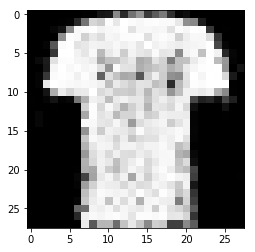

Epoch [99/100], Step [200/600], d_loss: 0.7341, g_loss: 2.3137, D(x): 0.69, D(G(z)): 0.17


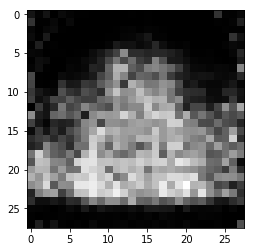

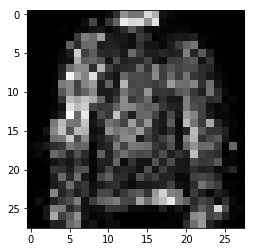

Epoch [99/100], Step [400/600], d_loss: 0.9089, g_loss: 1.9508, D(x): 0.71, D(G(z)): 0.28


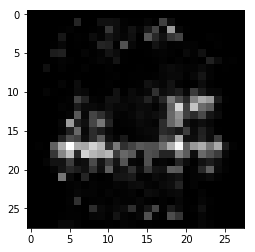

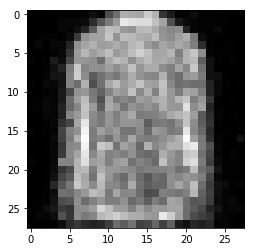

Epoch [99/100], Step [600/600], d_loss: 1.0064, g_loss: 2.6676, D(x): 0.63, D(G(z)): 0.21


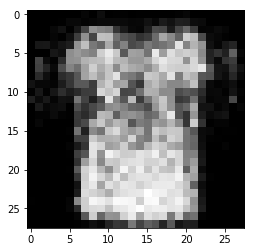

In [70]:
total_step = len(train_loader)
for epoch in range(EPOCHS):
    for i, (images, label) in enumerate(train_loader):
        images = images.reshape(BATCH_SIZE, -1)#.to(DEVICE)
        
        real_labels = torch.ones(BATCH_SIZE, 1)#.to(DEVICE)
        fake_labels = torch.zeros(BATCH_SIZE, 1)#.to(DEVICE)

        outputs = D(images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs
        
        class_label = one_hot_embedding(label, 10)
        z = torch.randn(BATCH_SIZE, 64)#.to(DEVICE)
        
        generator_input = torch.cat([z, class_label], 1)
        
        fake_images= G(generator_input)

        outputs = D(fake_images)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs
        
        # Backprop and optimize
        d_loss = d_loss_real + d_loss_fake
        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()
        
        # Train Generator

        # Compute loss with fake images
        fake_images = G(generator_input)
        outputs = D(fake_images)
        
        g_loss = criterion(outputs, real_labels)
        
        # Backprop and optimize
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()
        
        if (i+1) % 200 == 0:
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
                  .format(epoch, EPOCHS, i+1, total_step, d_loss.item(), g_loss.item(), 
                          real_score.mean().item(), fake_score.mean().item()))
        if (epoch+1) % 10 == 0 and (i+1) % 100 == 0 :
            fake_images = np.reshape(fake_images.data.numpy()[0],(28, 28))
            plt.imshow(fake_images, cmap = 'gray')
            plt.show()